In [1]:
#importing Necessary Libararies
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Importing the dataset
spam = pd.read_csv("C:\\Users\\muzaf\\Downloads\\New folder\\spam.csv", encoding='latin-1')
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
#dropping unnecessary columns
spam = spam.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis = 1)

In [4]:
#renaming the columns
spam = spam.rename(columns={"v1":"Label","v2":"Text"})
spam

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
print("No of rows", len(spam))


No of rows 5572


In [6]:
spam["Label"].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [7]:
spam.describe()


,Label,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
#creating a new column which gives the length of each text mail
spam["Lenght"] = spam['Text'].apply(len)
spam.head()

,Label,Text,Lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

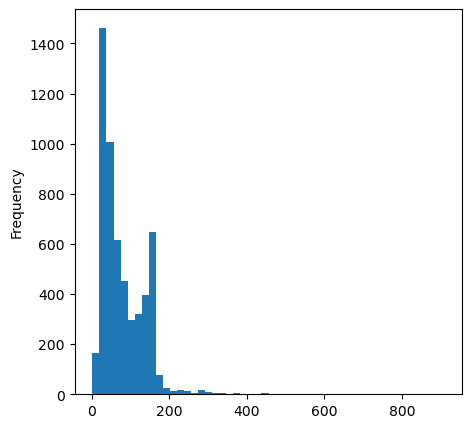

In [9]:
#creating a histogram for the length column
spam['Lenght'].plot(bins = 50, kind = "hist", figsize = (5,5))


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

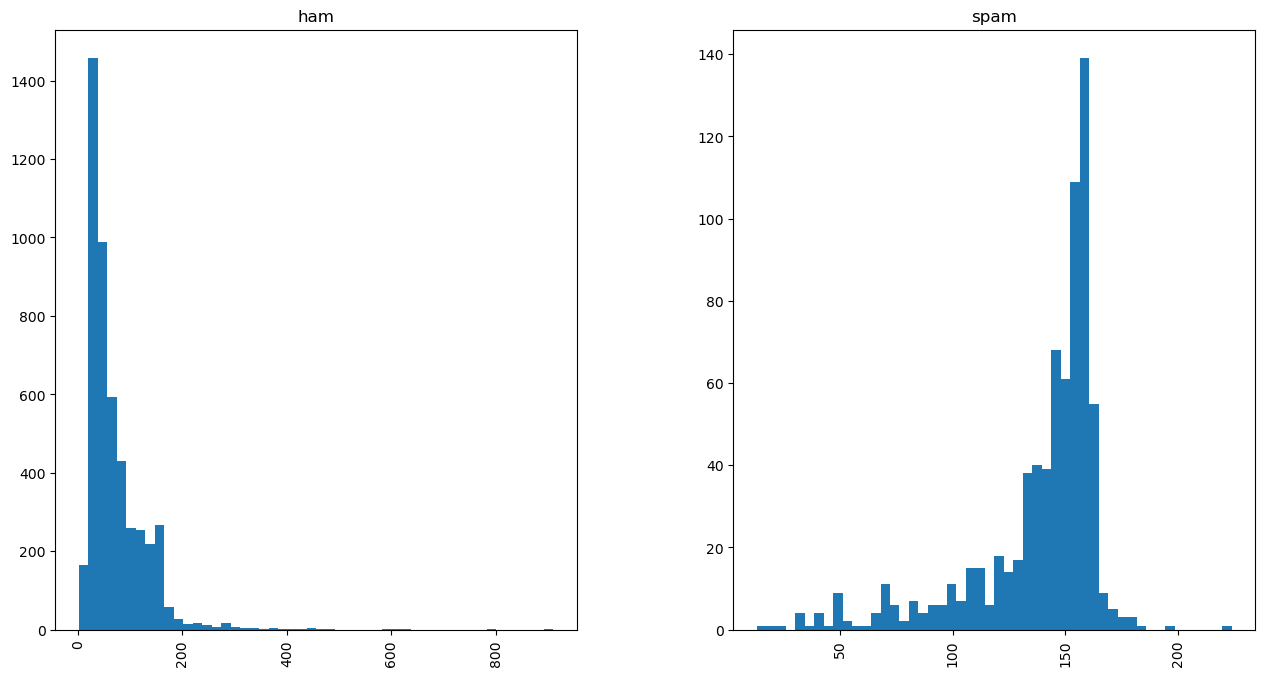

In [10]:
#creating a histogram for the length column with output as spam or ham
spam.hist(column = "Lenght", by = "Label", bins = 50, figsize = (15, 8))

In [11]:
#converting label categorical values into numerical type
dict1 = {"ham":0, "spam":1}
spam["Label"] = spam["Label"].map(dict1)
spam.head()


,Label,Text,Lenght
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
#Developing a model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
count = CountVectorizer()

#===========seperating the features and target variables======================= 
x = count.fit_transform(spam["Text"])
y = spam['Label']
#========================Splitting the data into train and test======================
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=3)

In [13]:
print(x_train.shape)
print(x_test.shape)


(4457, 8672)
(1115, 8672)


In [14]:
#Using Naive bayes Alorithm to develop a model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
model = MultinomialNB()
model.fit(x_train,y_train)


MultinomialNB()

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
#Getting an accuracy score for train data
x_train_pred = model.predict(x_train)
train_data_accuracy = accuracy_score(x_train_pred, y_train)

In [17]:
print("Accuracy on train data :",train_data_accuracy)

Accuracy on train data : 0.994166479694862


In [18]:
#Getting an accuracy score for test data
x_test_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_pred, y_test)

In [19]:
print("Accuracy on test data :",test_data_accuracy)

Accuracy on test data : 0.9865470852017937


**As we can see that the accuracy score of both the train and test data are above 75% which is considered as the best model**